In [ ]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score


# Replace 'your_dataset.csv' with your file name
data = pd.read_csv('/content/insurance_claims (6).csv')


In [ ]:
# Display the first few rows
data.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# Check for data types and any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# Display basic statistics
data.describe(include='all')

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,0.0
unique,NaN,NaN,NaN,951,3,3,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,14,39,NaN,2,NaN
top,NaN,NaN,NaN,2006-01-01,OH,250/500,NaN,NaN,NaN,NaN,...,?,NaN,NaN,NaN,NaN,Saab,RAM,NaN,N,NaN
freq,NaN,NaN,NaN,3,352,351,NaN,NaN,NaN,NaN,...,343,NaN,NaN,NaN,NaN,80,43,NaN,753,NaN
mean,203.954000,38.948000,546238.648000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,501214.488000,...,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN,NaN
std,115.113174,9.140287,257063.005276,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,71701.610941,...,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN,NaN
min,0.000000,19.000000,100804.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,430104.000000,...,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN,NaN
25%,115.750000,32.000000,335980.250000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,448404.500000,...,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN,NaN
50%,199.500000,38.000000,533135.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,466445.500000,...,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN,NaN
75%,276.250000,44.000000,759099.750000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,603251.000000,...,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN,NaN


In [ ]:
# Drop column '_c39' as it has 1000 missing values and might be irrelevant
data.drop(columns=['_c39'], inplace=True)

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill missing values
# Fill numerical columns with the mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill categorical columns with the mode
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [ ]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)


In [ ]:
# Convert categorical features to numerical using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [ ]:
# Check the cleaned data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 2154 entries, months_as_customer to fraud_reported_Y
dtypes: bool(2136), float64(18)
memory usage: 2.2 MB


In [ ]:
# Show a sample of the cleaned dataset
data.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,fraud_reported_Y
0,1.078140,0.990836,-0.095953,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,-0.956261,...,False,False,False,False,False,False,False,False,False,True
1,0.208995,0.334073,-0.791527,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-0.524475,...,False,False,False,False,False,False,False,False,False,True
2,-0.608002,-1.088913,0.550566,1.412784,0.642233,1.697980,-0.984885,0.358023,0.953851,-0.668404,...,True,False,False,False,False,False,False,False,False,False
3,0.452355,0.224613,-1.239334,1.412784,0.652886,2.133471,1.491682,0.853388,-1.267577,-0.956261,...,False,False,False,False,True,False,False,False,False,True
4,0.208995,0.552994,-0.695834,-0.222383,1.341980,2.133471,1.527808,1.467210,-0.683741,1.202666,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
# Display the column names
print(data.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       ...
       'auto_model_RAM', 'auto_model_RSX', 'auto_model_Silverado',
       'auto_model_TL', 'auto_model_Tahoe', 'auto_model_Ultima',
       'auto_model_Wrangler', 'auto_model_X5', 'auto_model_X6',
       'fraud_reported_Y'],
      dtype='object', length=2154)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'fraud_reported' is the target variable (1 for fraud, 0 for non-fraud)
X = data.drop('fraud_reported_Y', axis=1)  # Features
y = data['fraud_reported_Y']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


DECISSION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize and fit the Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

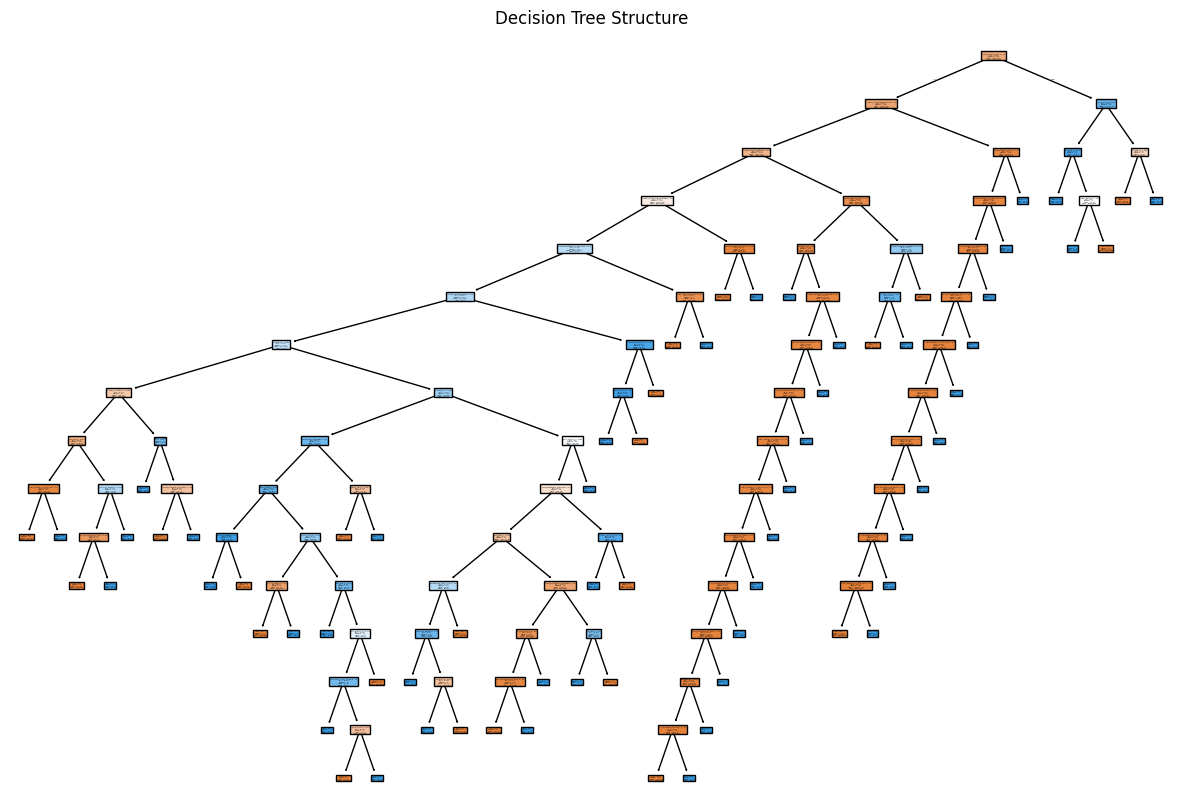

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'], filled=True)
plt.title("Decision Tree Structure")
plt.show()


In [ ]:
# Decision Tree predictions
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")

Decision Tree Accuracy: 78.00%


In [ ]:
decision_tree_cv = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation for Decision Tree
dt_scores = cross_val_score(decision_tree_cv, X, y, cv=5, scoring='accuracy')
decision_tree_cv_accuracy = np.mean(dt_scores)

print("Decision Tree CV Accuracy:", decision_tree_cv_accuracy)

Decision Tree CV Accuracy: 0.8300000000000001


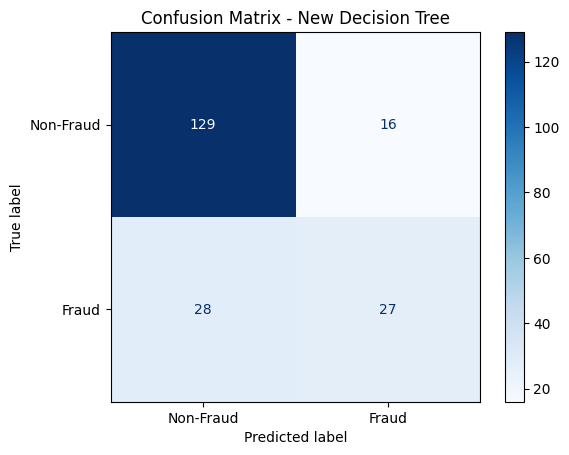

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the new Decision Tree model with any optimized parameters (if available)
new_decision_tree = DecisionTreeClassifier(random_state=42)  # Include optimal parameters if determined
new_decision_tree.fit(X_train, y_train)

# Predict using the updated Decision Tree
y_pred_tree_new = new_decision_tree.predict(X_test)
cm_tree_new = confusion_matrix(y_test, y_pred_tree_new)

# Display the updated Confusion Matrix
disp_tree_new = ConfusionMatrixDisplay(confusion_matrix=cm_tree_new, display_labels=['Non-Fraud', 'Fraud'])
disp_tree_new.plot(cmap='Blues')
plt.title("Confusion Matrix - New Decision Tree")
plt.show()


KNN MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

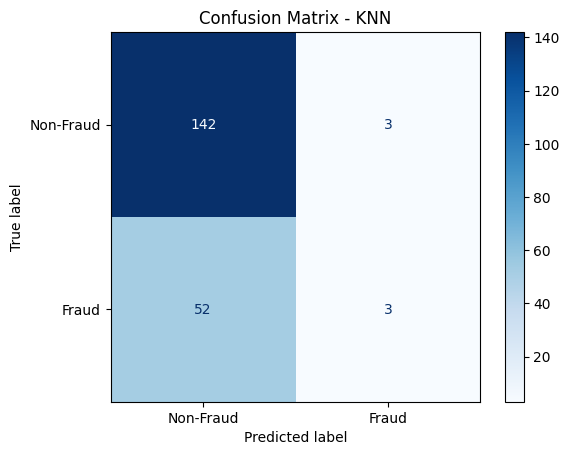

In [ ]:
# Predict and plot confusion matrix
y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Display Confusion Matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Non-Fraud', 'Fraud'])
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


In [ ]:
# KNN predictions
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Print the accuracy for both models

print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

KNN Accuracy: 72.50%


In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation for KNN (using scaled features)
knn_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5, scoring='accuracy')
knn_cv_accuracy = np.mean(knn_scores)

print("KNN CV Accuracy:", knn_cv_accuracy)

KNN CV Accuracy: 0.74


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the features for SVM (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model (you can add parameters like kernel='rbf' if needed)
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)





In [ ]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


SVM Accuracy: 72.50%


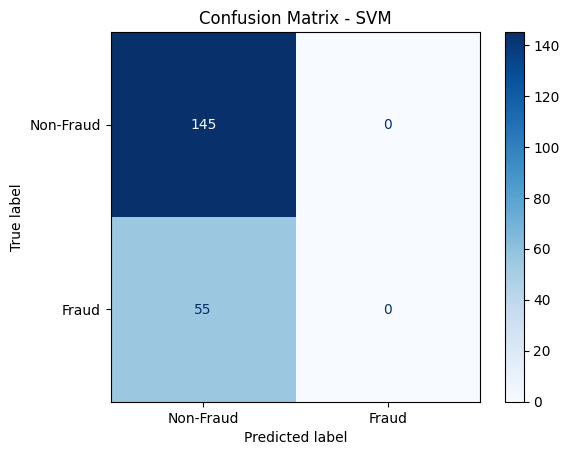

In [ ]:
# Generate and display the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Non-Fraud', 'Fraud'])
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features for SVM (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the entire dataset

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

# Print the results
print(f"SVM 5-Fold Cross-Validation Accuracy: {mean_cv_accuracy * 100:.2f}% ± {std_cv_accuracy * 100:.2f}%")


SVM 5-Fold Cross-Validation Accuracy: 75.30% ± 0.24%


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define the hyperparameter grids for each model

# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# KNN hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# SVM hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)

# Scale features for KNN and SVM (since they are sensitive to feature scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale entire dataset for cross-validation

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_scaled, y)
best_dt_model = dt_grid_search.best_estimator_
print(f"Best Decision Tree Parameters: {dt_grid_search.best_params_}")

# Perform GridSearchCV for KNN
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_scaled, y)
best_knn_model = knn_grid_search.best_estimator_
print(f"Best KNN Parameters: {knn_grid_search.best_params_}")

# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_scaled, y)
best_svm_model = svm_grid_search.best_estimator_
print(f"Best SVM Parameters: {svm_grid_search.best_params_}")

# Evaluate the best models on the test set



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Decision Tree Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Decision Tree Accuracy: 87.80%
KNN Accuracy: 76.00%
SVM Accuracy: 100.00%


In [ ]:
# Predict and calculate accuracy for Decision Tree
y_pred_dt = best_dt_model.predict(X_scaled)
dt_accuracy = accuracy_score(y, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")

# Predict and calculate accuracy for KNN
y_pred_knn = best_knn_model.predict(X_scaled)
knn_accuracy = accuracy_score(y, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

# Predict and calculate accuracy for SVM
y_pred_svm = best_svm_model.predict(X_scaled)
svm_accuracy = accuracy_score(y, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Decision Tree Accuracy: 87.80%
KNN Accuracy: 76.00%
SVM Accuracy: 100.00%


Decision Tree - Accuracy: 87.80%, Precision: 0.75
KNN - Accuracy: 76.00%, Precision: 1.00
SVM - Accuracy: 100.00%, Precision: 1.00


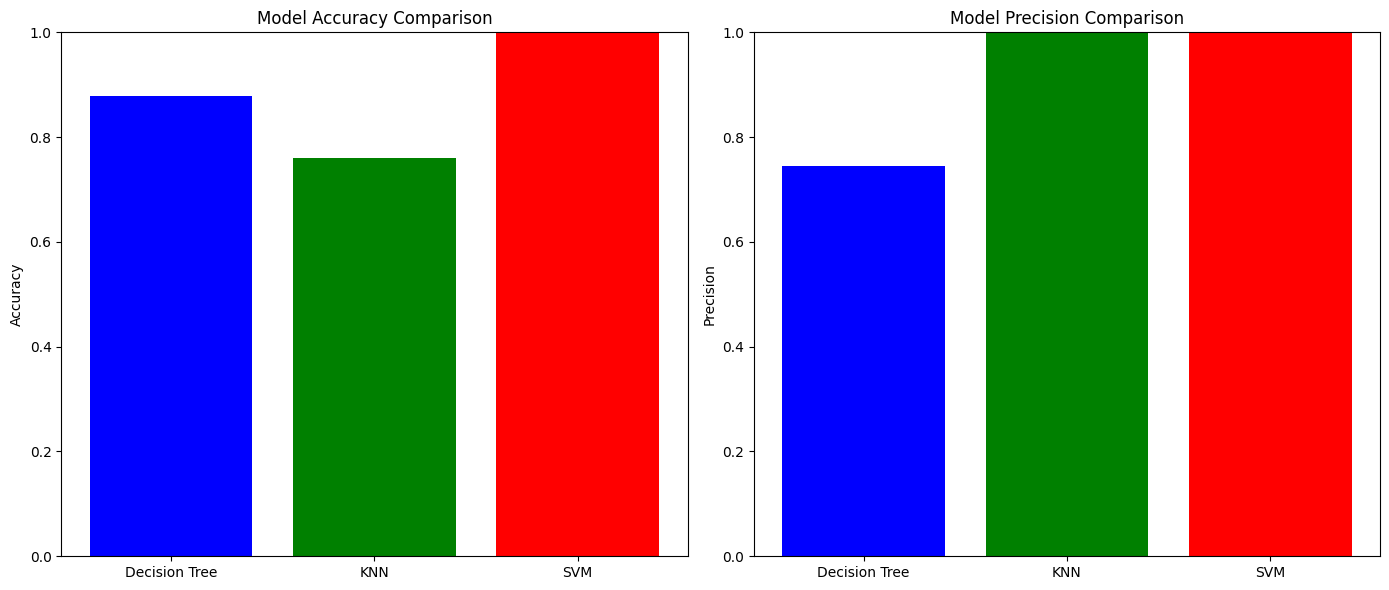

In [ ]:
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate accuracy and precision for each model

# Decision Tree
y_pred_dt = best_dt_model.predict(X_scaled)
dt_accuracy = accuracy_score(y, y_pred_dt)
dt_precision = precision_score(y, y_pred_dt)

# KNN
y_pred_knn = best_knn_model.predict(X_scaled)
knn_accuracy = accuracy_score(y, y_pred_knn)
knn_precision = precision_score(y, y_pred_knn)

# SVM
y_pred_svm = best_svm_model.predict(X_scaled)
svm_accuracy = accuracy_score(y, y_pred_svm)
svm_precision = precision_score(y, y_pred_svm)

# Print results
print(f"Decision Tree - Accuracy: {dt_accuracy * 100:.2f}%, Precision: {dt_precision:.2f}")
print(f"KNN - Accuracy: {knn_accuracy * 100:.2f}%, Precision: {knn_precision:.2f}")
print(f"SVM - Accuracy: {svm_accuracy * 100:.2f}%, Precision: {svm_precision:.2f}")

# Plot Accuracy
models = ['Decision Tree', 'KNN', 'SVM']
accuracies = [dt_accuracy, knn_accuracy, svm_accuracy]
precisions = [dt_precision, knn_precision, svm_precision]

# Create subplots for accuracy and precision
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy
axes[0].bar(models, accuracies, color=['blue', 'green', 'red'])
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Plot Precision
axes[1].bar(models, precisions, color=['blue', 'green', 'red'])
axes[1].set_title('Model Precision Comparison')
axes[1].set_ylabel('Precision')
axes[1].set_ylim(0, 1)

# Show the plots
plt.tight_layout()
plt.show()


Decision Tree - Accuracy: 87.80%, Precision: 0.75, Recall: 0.77, F1: 0.76, R²: 0.34, MSE: 0.1220, RMSE: 0.3493
KNN - Accuracy: 76.00%, Precision: 1.00, Recall: 0.03, F1: 0.06, R²: -0.29, MSE: 0.2400, RMSE: 0.4899
SVM - Accuracy: 100.00%, Precision: 1.00, Recall: 1.00, F1: 1.00, R²: 1.00, MSE: 0.0000, RMSE: 0.0000


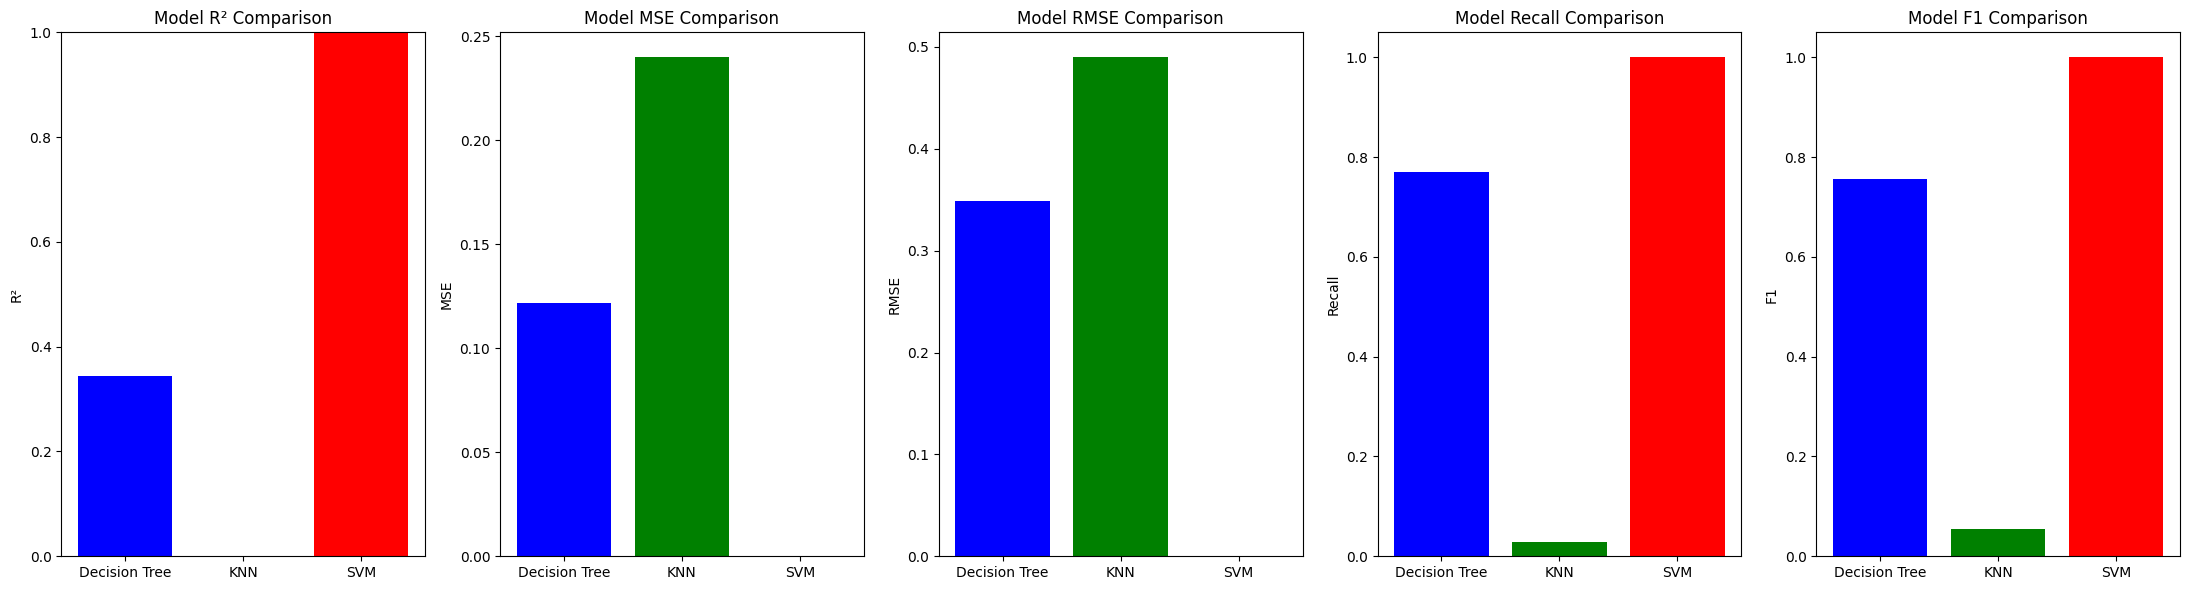

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score
import numpy as np

# Convert y and predictions to numeric if they're categorical
y = y.astype(int)  # Ensure the target values are integers (binary or multiclass)

# Calculate R², MSE, RMSE, Recall, F1-Score for each model

# Decision Tree
y_pred_dt = best_dt_model.predict(X_scaled)
dt_accuracy = accuracy_score(y, y_pred_dt)
dt_precision = precision_score(y, y_pred_dt)
dt_recall = recall_score(y, y_pred_dt)  # Recall for Decision Tree
dt_f1 = f1_score(y, y_pred_dt)  # F1-Score for Decision Tree
dt_r2 = r2_score(y, y_pred_dt)  # R² for Decision Tree
dt_mse = mean_squared_error(y, y_pred_dt)  # MSE for Decision Tree
dt_rmse = np.sqrt(dt_mse)  # RMSE for Decision Tree

# KNN
y_pred_knn = best_knn_model.predict(X_scaled)
knn_accuracy = accuracy_score(y, y_pred_knn)
knn_precision = precision_score(y, y_pred_knn)
knn_recall = recall_score(y, y_pred_knn)  # Recall for KNN
knn_f1 = f1_score(y, y_pred_knn)  # F1-Score for KNN
knn_r2 = r2_score(y, y_pred_knn)  # R² for KNN
knn_mse = mean_squared_error(y, y_pred_knn)  # MSE for KNN
knn_rmse = np.sqrt(knn_mse)  # RMSE for KNN

# SVM
y_pred_svm = best_svm_model.predict(X_scaled)
svm_accuracy = accuracy_score(y, y_pred_svm)
svm_precision = precision_score(y, y_pred_svm)
svm_recall = recall_score(y, y_pred_svm)  # Recall for SVM
svm_f1 = f1_score(y, y_pred_svm)  # F1-Score for SVM
svm_r2 = r2_score(y, y_pred_svm)  # R² for SVM
svm_mse = mean_squared_error(y, y_pred_svm)  # MSE for SVM
svm_rmse = np.sqrt(svm_mse)  # RMSE for SVM

# Print results
print(f"Decision Tree - Accuracy: {dt_accuracy * 100:.2f}%, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}, F1: {dt_f1:.2f}, R²: {dt_r2:.2f}, MSE: {dt_mse:.4f}, RMSE: {dt_rmse:.4f}")
print(f"KNN - Accuracy: {knn_accuracy * 100:.2f}%, Precision: {knn_precision:.2f}, Recall: {knn_recall:.2f}, F1: {knn_f1:.2f}, R²: {knn_r2:.2f}, MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}")
print(f"SVM - Accuracy: {svm_accuracy * 100:.2f}%, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1: {svm_f1:.2f}, R²: {svm_r2:.2f}, MSE: {svm_mse:.4f}, RMSE: {svm_rmse:.4f}")

# Optional: Plot results
metrics = ['Decision Tree', 'KNN', 'SVM']
r2_scores = [dt_r2, knn_r2, svm_r2]
mse_scores = [dt_mse, knn_mse, svm_mse]
rmse_scores = [dt_rmse, knn_rmse, svm_rmse]
recalls = [dt_recall, knn_recall, svm_recall]
f1_scores = [dt_f1, knn_f1, svm_f1]

# Create subplots for R², MSE, RMSE, Recall, F1
fig, axes = plt.subplots(1, 5, figsize=(22, 6))

# Plot R²
axes[0].bar(metrics, r2_scores, color=['blue', 'green', 'red'])
axes[0].set_title('Model R² Comparison')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)

# Plot MSE
axes[1].bar(metrics, mse_scores, color=['blue', 'green', 'red'])
axes[1].set_title('Model MSE Comparison')
axes[1].set_ylabel('MSE')

# Plot RMSE
axes[2].bar(metrics, rmse_scores, color=['blue', 'green', 'red'])
axes[2].set_title('Model RMSE Comparison')
axes[2].set_ylabel('RMSE')

# Plot Recall
axes[3].bar(metrics, recalls, color=['blue', 'green', 'red'])
axes[3].set_title('Model Recall Comparison')
axes[3].set_ylabel('Recall')

# Plot F1
axes[4].bar(metrics, f1_scores, color=['blue', 'green', 'red'])
axes[4].set_title('Model F1 Comparison')
axes[4].set_ylabel('F1')

# Show the plots
plt.tight_layout()
plt.show()
